In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [88]:
df = pd.read_csv('Dataset_OR.csv', encoding= 'unicode_escape')

In [89]:
df.shape

(541909, 8)

In [90]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [93]:
# Number of unique values of each feature

df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [94]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [95]:
# Creating a column of total amount per product per order, i.e. Quantity * UnitPrice

df['Amount'] = df['Quantity'] * df['UnitPrice']

In [96]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


# Cancelled Orders & Discounts

In [80]:
# Creating a separate dataframe of Cancelled orders and Discounts

df_cancelled = df[df['InvoiceNo'].str.contains("C")]
df_cancelled.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
141,C536379,D,Discount,-1,01-12-2010 09:41,27.50,14527.0,United Kingdom,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,01-12-2010 09:49,4.65,15311.0,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,01-12-2010 10:24,1.65,17548.0,United Kingdom,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,01-12-2010 10:24,0.29,17548.0,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,01-12-2010 10:24,0.29,17548.0,United Kingdom,-6.96


In [81]:
df_cancelled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9288 entries, 141 to 541717
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    9288 non-null   object 
 1   StockCode    9288 non-null   object 
 2   Description  9288 non-null   object 
 3   Quantity     9288 non-null   int64  
 4   InvoiceDate  9288 non-null   object 
 5   UnitPrice    9288 non-null   float64
 6   CustomerID   8905 non-null   float64
 7   Country      9288 non-null   object 
 8   Amount       9288 non-null   float64
dtypes: float64(3), int64(1), object(5)
memory usage: 725.6+ KB


In [82]:
df_cancelled.describe()

,Quantity,UnitPrice,CustomerID,Amount
count,9288.000000,9288.000000,8905.000000,9288.000000
mean,-29.885228,48.393661,14991.667266,-96.556039
std,1145.786965,666.600430,1706.772357,2039.905511
min,-80995.000000,0.010000,12346.000000,-168469.600000
25%,-6.000000,1.450000,13510.000000,-17.700000
50%,-2.000000,2.950000,14895.000000,-8.500000
75%,-1.000000,5.950000,16393.000000,-3.700000
max,-1.000000,38970.000000,18282.000000,-0.120000


In [65]:
# Number of unique values of each feature

df_cancelled.nunique()

InvoiceNo      3654
StockCode      1920
Description    1945
Quantity        134
InvoiceDate    3586
UnitPrice       376
CustomerID     1589
Country          28
Amount         1101
dtype: int64

In [98]:
print('Percentage of orders cancelled: 3654/25900 ({:.2f}%) '.format(2654/25900*100))

Percentage of orders cancelled: 3654/25900 (10.25%) 


# Missing Values

<AxesSubplot:>

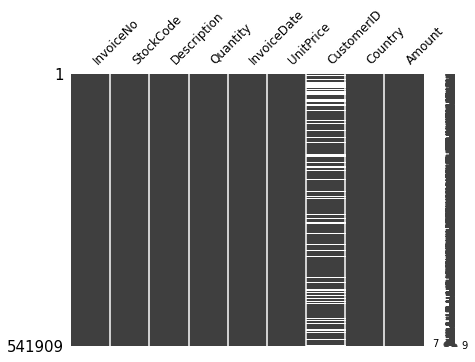

In [99]:
import missingno as msno 

# Visualizing missing values as a matrix 

msno.matrix(df, figsize=(7, 5), fontsize=12)

<AxesSubplot:>

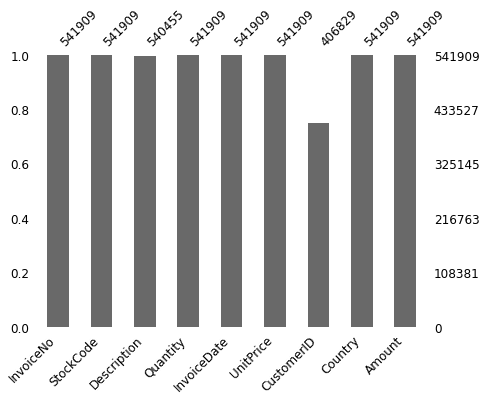

In [100]:
# Visualizing the number of missing values using a bar chart 

msno.bar(df, figsize=(7, 5), fontsize=12)

<AxesSubplot:>

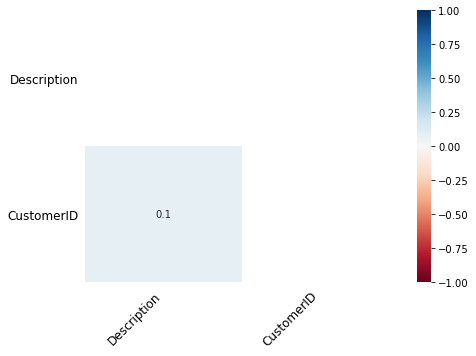

In [101]:
# Visualizing correlation between missing values using a heatmap

msno.heatmap(df, figsize=(7, 5), fontsize=12)

In [102]:
#Determining the percentage of missing values corresponding to each given feature

percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
Amount          0.000000
dtype: float64

# Preparing a separate dataframe without missing values

In [103]:
df1 = df.dropna()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
 8   Amount       406829 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 31.0+ MB


In [106]:
print('Percentage of data left post removal of missing values: 406829/541909 ({:.2f}%) '.format(406829/541909*100))

Percentage of data left post removal of missing values: 406829/541909 (75.07%) 


In [104]:
# Number of unique values in each feature

df1.nunique()

InvoiceNo      22190
StockCode       3684
Description     3896
Quantity         436
InvoiceDate    20460
UnitPrice        620
CustomerID      4372
Country           37
Amount          4041
dtype: int64

In [105]:
df1.describe()

,Quantity,UnitPrice,CustomerID,Amount
count,406829.000000,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570,20.401854
std,248.693370,69.315162,1713.600303,427.591718
min,-80995.000000,0.000000,12346.000000,-168469.600000
25%,2.000000,1.250000,13953.000000,4.200000
50%,5.000000,1.950000,15152.000000,11.100000
75%,12.000000,3.750000,16791.000000,19.500000
max,80995.000000,38970.000000,18287.000000,168469.600000


# Exploring CustomerID Data

In [133]:
# Total number of orders placed by each customer

cust_order = pd.DataFrame(df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index())
cust_order.head()

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


In [132]:
# Total revenue from each customer

cust_revenue = pd.DataFrame(df.groupby('CustomerID')['Amount'].sum().reset_index())
cust_revenue.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


# Exploring Country Data

In [131]:
# Total number of orders placed by each Country

country_orders = pd.DataFrame(df.groupby('Country')['InvoiceNo'].nunique().reset_index())
country_orders.head()

,Country,InvoiceNo
0,Australia,69
1,Austria,19
2,Bahrain,4
3,Belgium,119
4,Brazil,1


In [142]:
pd.set_option('float_format', '{:f}'.format) # to display complete numerical values

In [130]:
# Total Revenue from each Country

country_revenue = pd.DataFrame(df.groupby('Country')['Amount'].sum().reset_index())
country_revenue.head()

,Country,Amount
0,Australia,137077.27
1,Austria,10154.32
2,Bahrain,548.40
3,Belgium,40910.96
4,Brazil,1143.60


In [143]:
country_revenue.describe()

,Amount
count,38.000000
mean,256519.682474
std,1323505.685244
min,131.170000
25%,2053.077500
50%,10135.680000
75%,36282.087500
max,8187806.364001


# Exploring Product (StockCode) Data

In [134]:
# Quantity ordered of different products

product_orders = pd.DataFrame(df.groupby('StockCode')['Quantity'].sum().reset_index())
product_orders.head()

,StockCode,Quantity
0,10002,1037
1,10080,495
2,10120,193
3,10123C,-13
4,10123G,-38


In [136]:
product_orders.describe()

,Quantity
count,4070.000000
mean,1271.855037
std,3052.458716
min,-14418.000000
25%,32.000000
50%,300.500000
75%,1279.500000
max,56450.000000


# Exploring Bill-wise (InvoiceNo) Data

In [137]:
# Total Number of items per Invoice

invoice_items = pd.DataFrame(df.groupby('InvoiceNo')['Quantity'].sum().reset_index())
invoice_items.head()

,InvoiceNo,Quantity
0,536365,40
1,536366,12
2,536367,83
3,536368,15
4,536369,3


In [138]:
invoice_items.describe()

,Quantity
count,25900.000000
mean,199.862934
std,1108.563551
min,-80995.000000
25%,6.000000
50%,100.000000
75%,240.000000
max,80995.000000


In [139]:
# Total Revenue per Invoice

invoice_revenue = pd.DataFrame(df.groupby('InvoiceNo')['Amount'].sum().reset_index())
invoice_revenue.head()

,InvoiceNo,Amount
0,536365,139.12
1,536366,22.20
2,536367,278.73
3,536368,70.05
4,536369,17.85


In [140]:
invoice_revenue.describe()

,Amount
count,25900.000000
mean,376.360924
std,2013.261050
min,-168469.600000
25%,11.775000
50%,207.535000
75%,409.085000
max,168469.600000


# Exploring Price-wise (UnitPrice) Data

In [176]:
price_data = pd.DataFrame(df.groupby('UnitPrice')['Quantity'].sum().reset_index())
price_data.head()

,UnitPrice,Quantity
0,-11062.060000,2
1,0.000000,-134354
2,0.001000,4
3,0.010000,-720
4,0.030000,-9720


In [177]:
price_data.describe()

,UnitPrice,Quantity
count,1630.000000,1630.000000
mean,375.084902,3175.736196
std,1587.767252,25584.327258
min,-11062.060000,-134354.000000
25%,8.475000,1.000000
50%,103.020000,1.000000
75%,229.777500,14.000000
max,38970.000000,498171.000000


In [ ]:
# Creating Price Brackets of 50 Pound Sterling

for i in (0:len(price_data)):
    if UnitPrice[i] < 0:
        UnitPrice[i] = '<0'
    

In [ ]:
# Quantity of products ordered in different price brackets



In [ ]:
# Total Revenue in different price brackets



# Exploring Date-Time (InvoiceDate) Data

In [152]:
from datetime import datetime as dt

In [159]:
df['InvoiceDate'] =  pd.to_datetime(df['InvoiceDate'], infer_datetime_format=True)

In [162]:
df['Day'] = df['InvoiceDate'].dt.day_name()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Month,Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.550000,17850.000000,United Kingdom,15.300000,January,Tuesday
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.390000,17850.000000,United Kingdom,20.340000,January,Tuesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.750000,17850.000000,United Kingdom,22.000000,January,Tuesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.390000,17850.000000,United Kingdom,20.340000,January,Tuesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.390000,17850.000000,United Kingdom,20.340000,January,Tuesday


In [161]:
df['Month'] = df['InvoiceDate'].dt.month_name()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.550000,17850.000000,United Kingdom,15.300000,January
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.390000,17850.000000,United Kingdom,20.340000,January
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.750000,17850.000000,United Kingdom,22.000000,January
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.390000,17850.000000,United Kingdom,20.340000,January
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.390000,17850.000000,United Kingdom,20.340000,January


In [173]:
# Total number of orders on different days of the week

day_orders = pd.DataFrame(df.groupby('Day')['InvoiceNo'].nunique().reset_index())
day_orders

,Day,InvoiceNo
0,Friday,3914
1,Monday,3931
2,Saturday,1537
3,Sunday,3094
4,Thursday,4925
5,Tuesday,4476
6,Wednesday,4023


In [174]:
day_orders.describe()

,InvoiceNo
count,7.000000
mean,3700.000000
std,1106.954681
min,1537.000000
25%,3504.000000
50%,3931.000000
75%,4249.500000
max,4925.000000


In [166]:
# Total Revenue on different days of the week

day_revenue = pd.DataFrame(df.groupby('Day')['Amount'].sum().reset_index())
day_revenue

,Day,Amount
0,Friday,1485654.911000
1,Monday,1488332.781000
2,Saturday,545097.300000
3,Sunday,1053830.331000
4,Thursday,1771808.670000
5,Tuesday,1983955.151000
6,Wednesday,1419068.790000


In [172]:
day_revenue.describe()

,Amount
count,7.000000
mean,1392535.419143
std,473471.293503
min,545097.300000
25%,1236449.560500
50%,1485654.911000
75%,1630070.725500
max,1983955.151000


In [ ]:
# Plotting Day-wise Total Revenue & Orders

In [ ]:
# Average Weekday (Monday to Friday) Revenue & Orders vs Weekend (Saturday & Sunday) Revenue & Orders

In [167]:
# Total number of orders in different months

month_orders = pd.DataFrame(df.groupby('Month')['InvoiceNo'].nunique().reset_index())
month_orders

,Month,InvoiceNo
0,April,1821
1,August,2130
2,December,1468
3,February,1647
4,January,1914
5,July,2307
6,June,2362
7,March,2043
8,May,2179
9,November,3052


In [171]:
month_orders.describe()

,InvoiceNo
count,12.000000
mean,2158.333333
std,427.824164
min,1468.000000
25%,1890.750000
50%,2154.500000
75%,2378.750000
max,3052.000000


In [169]:
# Total Revenue in different months

month_revenue = pd.DataFrame(df.groupby('Month')['Amount'].sum().reset_index())
month_revenue

,Month,Amount
0,April,660149.571000
1,August,759822.560000
2,December,529826.200000
3,February,588718.820000
4,January,666383.670000
5,July,888950.281000
6,June,799112.520000
7,March,757679.970000
8,May,765153.270000
9,November,1297606.420000


In [170]:
month_revenue.describe()

,Amount
count,12.000000
mean,812312.327833
std,215165.205304
min,529826.200000
25%,664825.145250
50%,762487.915000
75%,914026.978250
max,1297606.420000


In [ ]:
# Plotting Monthly Total Revenue & Orders

In [11]:
import dtale

In [107]:
dtale.show(df1)

Exception on /dtale/charts/_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\shubh\anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\shubh\anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\shubh\anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\shubh\anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\shubh\anaconda3\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\shubh\anaconda3\lib\site-packages\flask\app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\shubh\anaconda3\lib\site-packages\dash\dash.py", line 1076, in dispatch
    r

2021-01-30 22:28:24,728 - ERROR    - Exception on /dtale/charts/_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\shubh\anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\shubh\anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\shubh\anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\shubh\anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\shubh\anaconda3\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\shubh\anaconda3\lib\site-packages\flask\app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\shubh\anaconda3\lib\site-packages\dash\d